In [1]:
#widen display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import gmaps

# API Keys
from config import api_key

# Configure gmaps
gmaps.configure(api_key=api_key)

In [3]:
# Read in the Dallas County Appraisal District (DCAD) property values file
zip_group_file = "Resources/zip_group_csv.csv"

#create DataFrame
summary_by_zip_df = pd.read_csv(zip_group_file)

In [4]:
#focus on zipcodes with more than 500 properties
summary_by_zip_df = summary_by_zip_df[summary_by_zip_df.PropertyValueCount >= 500]

summary_by_zip_df.head()

,Unnamed: 0,Zipcode,PropertyValueCount,MeanPropertyValue,MeanPropertyDollarValue,Lat,Lng,City,State,bank_count,bank_rating,supermarket_count,supermarket_rating,hospital_count,hospital_rating,cafe_count,cafe_rating
0,0,75205,6415,1.606362e+06,"$1,606,362",32.832584,-96.797592,Dallas,TX,41,3.595122,13,4.415385,15,3.946667,46,3.819565
1,1,75225,7633,1.207824e+06,"$1,207,824",32.869505,-96.789557,Dallas,TX,37,3.483784,8,4.362500,5,4.160000,28,3.903571
2,2,75201,1326,9.667580e+05,"$966,758",32.786330,-96.796253,Dallas,TX,35,3.477143,12,4.208333,14,3.714286,26,4.003846
3,3,75209,5424,7.230552e+05,"$723,055",32.853872,-96.819022,Dallas,TX,35,3.482857,11,4.172727,9,4.111111,33,3.960606
4,4,75230,9337,7.046378e+05,"$704,638",32.900512,-96.786879,Dallas,TX,40,3.372500,6,4.166667,14,3.628571,21,4.071429


In [5]:
#Group Property Values by City
city_group = summary_by_zip_df.groupby('City')['MeanPropertyValue'].agg(('sum', 'mean'))\
                    .rename(columns={'sum':'PropertyValueCount', 'mean':'MeanPropertyValue'})\
                    .sort_values(by='MeanPropertyValue', ascending=False)\
                    .reset_index()
city_group.head()

,City,PropertyValueCount,MeanPropertyValue
0,Coppell,4.157977e+05,415797.678477
1,Dallas,1.355087e+07,330509.000544
2,Addison,3.152085e+05,315208.491704
3,Irving,1.651716e+06,275286.033266
4,Richardson,8.184734e+05,272824.467602


Text(0, 0.5, 'Average Property Value')

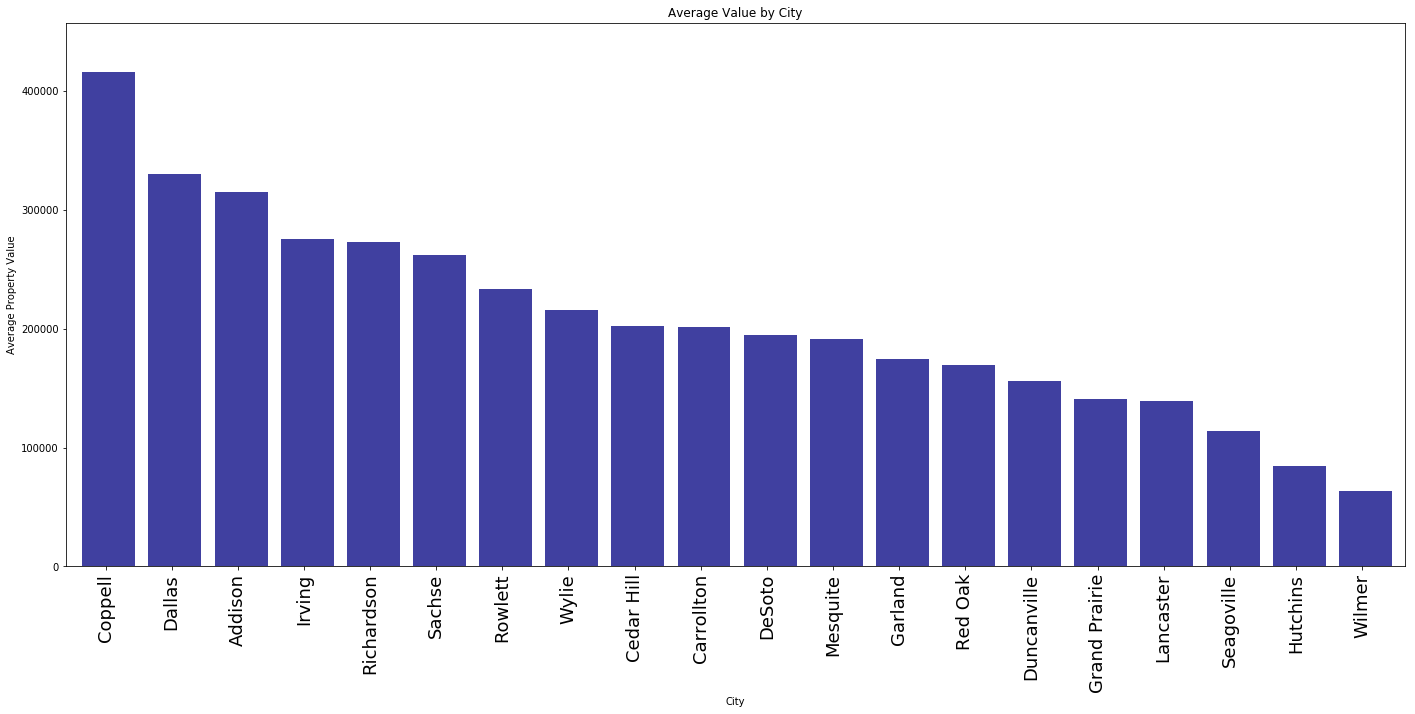

In [18]:
#Grpah property values by City
# Set x axis and tick locations
x_axis = np.arange(len(city_group))
tick_locations = [value+0.35 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(24,10))
plt.bar(x_axis, city_group["MeanPropertyValue"], color='navy', alpha=0.75, align="edge")
plt.xticks(tick_locations, city_group["City"], rotation="vertical", fontsize="18")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(city_group["MeanPropertyValue"])*1.1)

# Set a Title and labels
plt.title("Average Value by City")
plt.xlabel("City")
plt.ylabel("Average Property Value")

In [19]:
#Get 5 Zipcodes with highest values
zip_group_top = summary_by_zip_df.head(5)

#Get 5 Zipcodes with lowest values
zip_group_bottom = summary_by_zip_df.tail(5)

zip_group_top_and_bottom = zip_group_top.append(zip_group_bottom)
zip_group_top_and_bottom

,Unnamed: 0,Zipcode,PropertyValueCount,MeanPropertyValue,MeanPropertyDollarValue,Lat,Lng,City,State,bank_count,bank_rating,supermarket_count,supermarket_rating,hospital_count,hospital_rating,cafe_count,cafe_rating
0,0,75205,6415,1.606362e+06,"$1,606,362",32.832584,-96.797592,Dallas,TX,41,3.595122,13,4.415385,15,3.946667,46,3.819565
1,1,75225,7633,1.207824e+06,"$1,207,824",32.869505,-96.789557,Dallas,TX,37,3.483784,8,4.362500,5,4.160000,28,3.903571
2,2,75201,1326,9.667580e+05,"$966,758",32.786330,-96.796253,Dallas,TX,35,3.477143,12,4.208333,14,3.714286,26,4.003846
3,3,75209,5424,7.230552e+05,"$723,055",32.853872,-96.819022,Dallas,TX,35,3.482857,11,4.172727,9,4.111111,33,3.960606
4,4,75230,9337,7.046378e+05,"$704,638",32.900512,-96.786879,Dallas,TX,40,3.372500,6,4.166667,14,3.628571,21,4.071429
83,83,75203,2802,7.551809e+04,"$75,518",32.743300,-96.786879,Dallas,TX,20,3.295000,8,3.912500,1,3.200000,6,3.983333
84,84,75172,881,6.372479e+04,"$63,725",32.602835,-96.679851,Wilmer,TX,0,NaN,0,NaN,0,NaN,0,NaN
85,85,75216,14850,5.710002e+04,"$57,100",32.703088,-96.802949,Dallas,TX,13,2.807692,5,3.860000,1,3.400000,0,NaN
86,86,75215,4430,5.304015e+04,"$53,040",32.755695,-96.765460,Dallas,TX,19,3.542105,5,3.940000,8,3.837500,13,4.046154
90,90,75210,1681,3.301014e+04,"$33,010",32.765421,-96.741371,Dallas,TX,6,2.983333,4,3.975000,8,3.837500,5,3.440000


In [20]:
# Set the top 5 and bottom 5 zips to map
top_zip_locations_to_map = list(zip(summary_by_zip_df.head(25)['Lat'], summary_by_zip_df.head(25)['Lng']))
bottom_zip_locations_to_map = list(zip(summary_by_zip_df.tail(25)['Lat'], summary_by_zip_df.tail(25)['Lng']))

In [21]:
# Customize the size of the figure
figure_layout = {
    'height': '840px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

In [22]:
gmaps.configure(api_key=api_key)
dallas_county_coordinates = (32.7500, -96.7800)

with open('Resources/Dallas_County.geojson') as f:
    geometry = json.load(f)

fig = gmaps.figure(layout=figure_layout, center=dallas_county_coordinates, zoom_level=11)
geojson_layer = gmaps.geojson_layer(geometry, fill_opacity=0.03, fill_color='blue')
fig.add_layer(geojson_layer)

# Assign the symbols layer to a variable
symbols_top = gmaps.symbol_layer(
        top_zip_locations_to_map, fill_color='navy', stroke_color='navy', hover_text='Top', scale=5)
symbols_bottom = gmaps.symbol_layer(
        bottom_zip_locations_to_map, fill_color='#f5bc42', stroke_color='#f5bc42', scale = 5)

# Add the layer to the map
fig.add_layer(symbols_top)
fig.add_layer(symbols_bottom)
fig

Figure(layout=FigureLayout(border='1px solid black', height='840px', margin='0 auto 0 auto', padding='1px'))

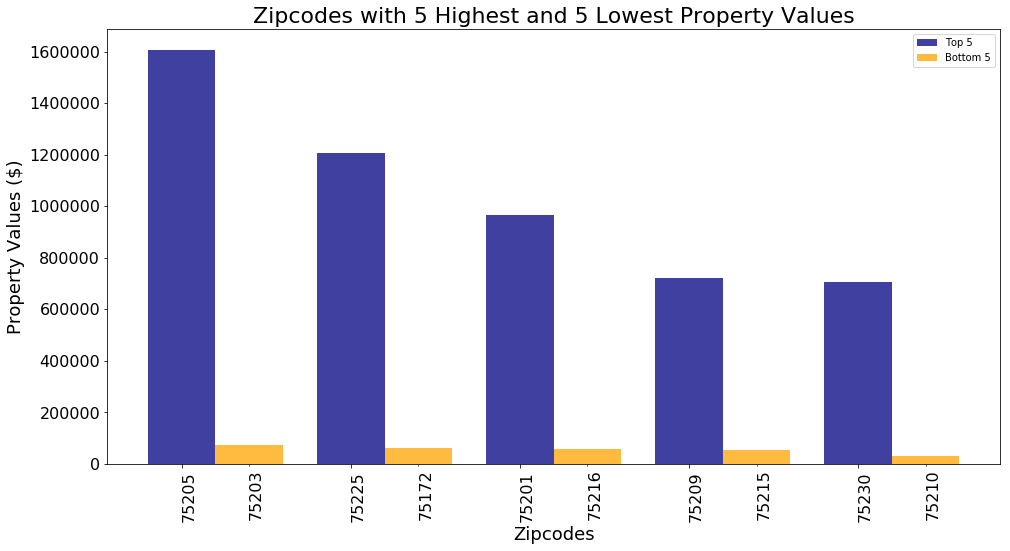

In [25]:
value = zip_group_top['MeanPropertyValue']
value2 = zip_group_bottom['MeanPropertyValue']

fig, ax = plt.subplots(figsize=(16,8))
index = np.arange(len(zip_group_top))
index2 = np.arange(len(zip_group_bottom))
opacity=.75
bar_width = 0.4

rects1 = plt.bar(index, value, bar_width, alpha=opacity, color='navy', label='Top 5')
rects2 = plt.bar(index2 + bar_width, value2, bar_width, alpha=opacity, color='orange', label='Bottom 5')
plt.legend()
plt.title("Zipcodes with 5 Highest and 5 Lowest Property Values", fontsize=22)
#plt.xticks(index, zip_group_top["Zipcode"], rotation="vertical")
#plt.xticks(index2 +bar_width, zip_group_bottom["Zipcode"], rotation="vertical")
plt.xlabel('Zipcodes', fontsize=18)
plt.ylabel("Property Values ($)", fontsize=18)

ax.set_xticks(index,minor=False)
ax.set_xticks(index2 + bar_width,minor=True)
ax.set_xticklabels(zip_group_top["Zipcode"],rotation=90,minor=False,ha='left')
ax.set_xticklabels(zip_group_bottom["Zipcode"],rotation=90,minor=True,ha='left')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)


In [26]:
summary_by_zip_df['bank_count'].corr(summary_by_zip_df['MeanPropertyValue'])

0.5510588608040583

In [27]:
summary_by_zip_df['supermarket_count'].corr(summary_by_zip_df['MeanPropertyValue'])

0.39574748299039

In [28]:
summary_by_zip_df['hospital_count'].corr(summary_by_zip_df['MeanPropertyValue'])

0.40783057310474846

In [29]:
summary_by_zip_df['cafe_count'].corr(summary_by_zip_df['MeanPropertyValue'])

0.6913339695137416

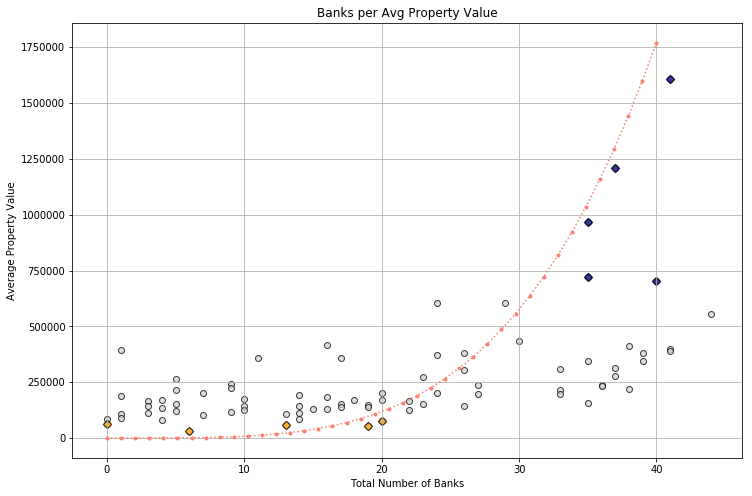

In [30]:
bank_x = summary_by_zip_df['bank_count']
bank_y = summary_by_zip_df['MeanPropertyValue']
bank_x2 = zip_group_top['bank_count']
bank_y2 = zip_group_top['MeanPropertyValue']
bank_x3 = zip_group_bottom['bank_count']
bank_y3 = zip_group_bottom['MeanPropertyValue']

plt.figure(figsize=(12,8))

plt.scatter(bank_x, bank_y, label = 'banks', color = ['lightgray'], edgecolor = 'black', alpha = 0.75, marker = 'o')
plt.scatter(bank_x2, bank_y2, label = 'banks', color = ['navy'], edgecolor = 'black', alpha = 0.75, marker = 'D')
plt.scatter(bank_x3, bank_y3, label = 'banks', color = ['orange'], edgecolor = 'black', alpha = 0.75, marker = 'D')


plt.plot(np.linspace(0, 40, 40), np.power(np.linspace(0, 40, 40), 3.9), c= "salmon", marker='.', linestyle=':')

plt.xlabel('Total Number of Banks')
plt.ylabel('Average Property Value')
plt.title('Banks per Avg Property Value')
plt.grid()
plt.show()

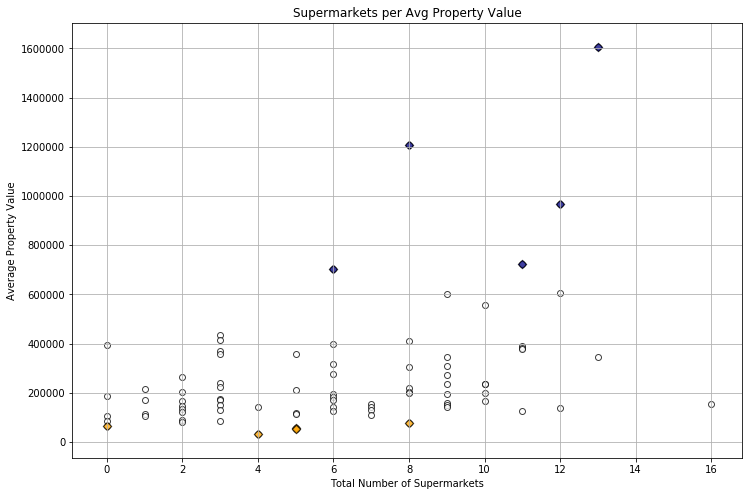

In [31]:

supermarket_x = summary_by_zip_df['supermarket_count']
supermarket_y = summary_by_zip_df['MeanPropertyValue']
supermarket_x2 = zip_group_top['supermarket_count']
supermarket_y2 = zip_group_top['MeanPropertyValue']
supermarket_x3 = zip_group_bottom['supermarket_count']
supermarket_y3 = zip_group_bottom['MeanPropertyValue']

plt.figure(figsize=(12,8))

plt.scatter(supermarket_x, supermarket_y, label = 'supermarket', color = ['white'], edgecolor = 'black', alpha = 0.75, marker = 'o')
plt.scatter(supermarket_x2, supermarket_y2, label = 'supermarket', color = ['navy'], edgecolor = 'black', alpha = 0.75, marker = 'D')
plt.scatter(supermarket_x3, supermarket_y3, label = 'supermarket', color = ['orange'], edgecolor = 'black', alpha = 0.75, marker = 'D')

#plt.gca().invert_yaxis()



plt.xlabel('Total Number of Supermarkets')
plt.ylabel('Average Property Value')
plt.title('Supermarkets per Avg Property Value')
plt.grid()
plt.show()

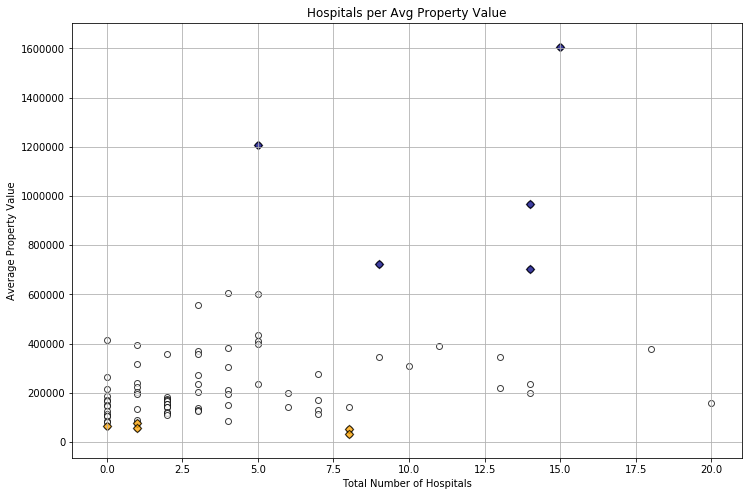

In [32]:
hospital_x = summary_by_zip_df['hospital_count']
hospital_y = summary_by_zip_df['MeanPropertyValue']
hospital_x2 = zip_group_top['hospital_count']
hospital_y2 = zip_group_top['MeanPropertyValue']
hospital_x3 = zip_group_bottom['hospital_count']
hospital_y3 = zip_group_bottom['MeanPropertyValue']

plt.figure(figsize=(12,8))

plt.scatter(hospital_x, hospital_y, label = 'hospital', color = ['white'], edgecolor = 'black', alpha = 0.75, marker = 'o')
plt.scatter(hospital_x2, hospital_y2, label = 'hospital', color = ['navy'], edgecolor = 'black', alpha = 0.75, marker = 'D')
plt.scatter(hospital_x3, hospital_y3, label = 'hospital', color = ['orange'], edgecolor = 'black', alpha = 0.75, marker = 'D')

#plt.gca().invert_yaxis()


plt.xlabel('Total Number of Hospitals')
plt.ylabel('Average Property Value')
plt.title('Hospitals per Avg Property Value')
plt.grid()
plt.show()

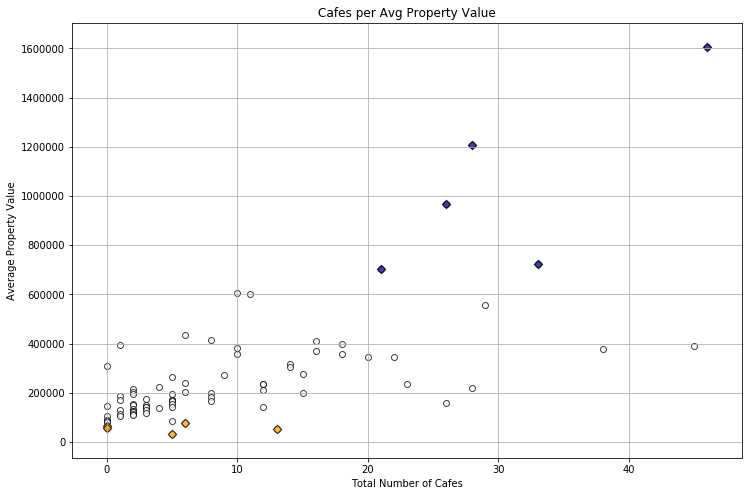

In [33]:
cafe_x = summary_by_zip_df['cafe_count']
cafe_y = summary_by_zip_df['MeanPropertyValue']
cafe_x2 = zip_group_top['cafe_count']
cafe_y2 = zip_group_top['MeanPropertyValue']
cafe_x3 = zip_group_bottom['cafe_count']
cafe_y3 = zip_group_bottom['MeanPropertyValue']

plt.figure(figsize=(12,8))

plt.scatter(cafe_x, cafe_y, label = 'cafe', color = ['white'], edgecolor = 'black', alpha = 0.75, marker = 'o')
plt.scatter(cafe_x2, cafe_y2, label = 'cafe', color = ['navy'], edgecolor = 'black', alpha = 0.75, marker = 'D')
plt.scatter(cafe_x3, cafe_y3, label = 'cafe', color = ['orange'], edgecolor = 'black', alpha = 0.75, marker = 'D')

#plt.gca().invert_yaxis()


plt.xlabel('Total Number of Cafes')
plt.ylabel('Average Property Value')
plt.title('Cafes per Avg Property Value')
plt.grid()
plt.show()